## İçindekiler
1.  [İçerik](#a)
2.  [Öz Nitelik Bilgileri](#b)
3.  [Veri Ön İşleme](#c)
4.  [Modelleme](#d)

# 1.İçerik<a id='a'></a>


## 2.Öz Nitelik Bilgileri<a id='b'></a>

* **Age(Yas):** Hastanın yaşı
* **Gender(Cinsiyet):** Hastanın Cinsiyeti
* **Total_Bilirubin(T_B):** Toplam Bilirubin
* **Direct_Bilirubin(D_B):** Doğrudan bilirubin
* **Alkaline_Phosphotase(A_F):** Alkali Fosfotaz
* **Alamine_Aminotransferase(A_A):** Alamin Aminotransferaz
* **Aspartate_Aminotransferase(Asp_A):** Aspartat Aminotransferaz
* **Total_Protiens(T_P):** Toplam Protiens
* **Albumin(Albümin):** Albümin
* **Albumin_and_Globulin_Ratio(A_G_R):** Albumin ve Globulin Oranı
* **Dataset(Cikti_Sinifi):** Sınıf değişkeni (0 veya 1)

Bu veri seti, Hindistan'ın Andhra Pradesh kentinin Kuzeydoğusundan toplanan 416 karaciğer hastası ve 167 karaciğer dışı hasta kaydını içermektedir. "Dataset" sütunu, grupları karaciğer hastası veya olmayan (hastalıksız) ayıran sınıflar içerir. Bu veri seti 441 erkek hasta kaydı ve 142 kadın hasta kaydını içermektedir.


## 3.Veri Ön İşleme<a id='c'></a>
1. [Python Kütüphaneler](#1)
1. [Veri Ekleme ve Ön Bakış](#2)
    1. [Öznitelikleri Türkçe Yapma](#2.1)
1. [Kayıp Veri ve Benzersiz Değer Analizi](#3)
    1. [Eksik veri doldurma](#3.1)
1. [Kategorik Özellikleri Sayısal Forma Dönüştürme](#4)
1. [Sayısal Özellik Analizi](#5)
1. [Standardizasyon](#6)
1. [Box Plot Analizi](#7)
1. [Swarm Analizi](#8)
1. [Korelasyon Analizi](#9)

## 3.1.Python Kütüphaneler<a id='1'></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings("ignore")

## 3.2.Veri Ekleme ve Ön Bakış <a id='2'></a> 

In [2]:
data=pd.read_csv('./data.csv')
data.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

In [3]:
data.shape

(583, 11)

In [4]:
data.sample(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
259   42    Male             30.5              14.2                   285   
138   18    Male              0.8               0.2                   282   
479   33    Male              3.4               1.6                   186   
91    60    Male              6.8               3.2                   308   
573   32    Male              3.7               1.6                   612   
361   65  Female              0.7               0.2                   182   
461   28  Female              0.8               0.2                   309   
367   60    Male              2.2               1.0                   271   
582   38    Male              1.0               0.3                   216   
30    57    Male              4.0               1.9                   190   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
259                        65                         130             5.2   
138                        72                         140             5.5   
479                       779                         844             7.3   
91                        404                         794             6.8   
573                        50                          88             6.2   
361                        23                          28             6.8   
461                        55                          23             6.8   
367                        45                          52             6.1   
582                        21                          24             7.3   
30                         45                         111             5.2   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
259      2.1                        0.60        1  
138      2.5                        0.80        1  
479      3.2                        0.70        1  
91       3.0                        0.70        1  
573      1.9                        0.40        1  
361      2.9                        0.70        2  
461      4.1                        1.51        1  
367      2.9                        0.90        2  
582      4.4                        1.50        2  
30       1.5                        0.40        1

In [5]:
data.describe().T

count        mean         std   min    25%  \
Age                         583.0   44.746141   16.189833   4.0   33.0   
Total_Bilirubin             583.0    3.298799    6.209522   0.4    0.8   
Direct_Bilirubin            583.0    1.486106    2.808498   0.1    0.2   
Alkaline_Phosphotase        583.0  290.576329  242.937989  63.0  175.5   
Alamine_Aminotransferase    583.0   80.713551  182.620356  10.0   23.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0   25.0   
Total_Protiens              583.0    6.483190    1.085451   2.7    5.8   
Albumin                     583.0    3.141852    0.795519   0.9    2.6   
Albumin_and_Globulin_Ratio  579.0    0.947064    0.319592   0.3    0.7   
Dataset                     583.0    1.286449    0.452490   1.0    1.0   

                               50%    75%     max  
Age                          45.00   58.0    90.0  
Total_Bilirubin               1.00    2.6    75.0  
Direct_Bilirubin              0.30    1.3    19.7  
Alkaline_Phosphotase        208.00  298.0  2110.0  
Alamine_Aminotransferase     35.00   60.5  2000.0  
Aspartate_Aminotransferase   42.00   87.0  4929.0  
Total_Protiens                6.60    7.2     9.6  
Albumin                       3.10    3.8     5.5  
Albumin_and_Globulin_Ratio    0.93    1.1     2.8  
Dataset                       1.00    2.0     2.0

In [6]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
for i in list(data.columns):
    print("{} -- {} ".format(i,data[i].value_counts().shape[0]))

Age -- 72 
Gender -- 2 
Total_Bilirubin -- 113 
Direct_Bilirubin -- 80 
Alkaline_Phosphotase -- 263 
Alamine_Aminotransferase -- 152 
Aspartate_Aminotransferase -- 177 
Total_Protiens -- 58 
Albumin -- 40 
Albumin_and_Globulin_Ratio -- 69 
Dataset -- 2 


### 3.2.1. Öznitelikleri Türkçe Yapma<a id='2.1'></a>

In [9]:
data.rename(columns={'Age':'Yas','Gender':'Cinsiyet','Total_Bilirubin':'T_B','Direct_Bilirubin':'D_B',
                     'Alkaline_Phosphotase':'A_F','Alamine_Aminotransferase':'A_A','Aspartate_Aminotransferase':'Asp_A',
                     'Total_Protiens':'T_P','Albumin':'Albümin','Albumin_and_Globulin_Ratio':'A_G_R',
                     'Dataset':'Cikti_Sinifi'},inplace=True)
data.head()

Yas Cinsiyet   T_B  D_B  A_F  A_A  Asp_A  T_P  Albümin  A_G_R  Cikti_Sinifi
0   65   Female   0.7  0.1  187   16     18  6.8      3.3   0.90             1
1   62     Male  10.9  5.5  699   64    100  7.5      3.2   0.74             1
2   62     Male   7.3  4.1  490   60     68  7.0      3.3   0.89             1
3   58     Male   1.0  0.4  182   14     20  6.8      3.4   1.00             1
4   72     Male   3.9  2.0  195   27     59  7.3      2.4   0.40             1

## 3.3. Kayıp Veri ve Benzersiz Değer Analizi <a id='3'></a>

In [10]:
data.eq(0).sum()

Yas             0
Cinsiyet        0
T_B             0
D_B             0
A_F             0
A_A             0
Asp_A           0
T_P             0
Albümin         0
A_G_R           0
Cikti_Sinifi    0
dtype: int64

In [11]:
data.isnull()

Yas  Cinsiyet    T_B    D_B    A_F    A_A  Asp_A    T_P  Albümin  \
0    False     False  False  False  False  False  False  False    False   
1    False     False  False  False  False  False  False  False    False   
2    False     False  False  False  False  False  False  False    False   
3    False     False  False  False  False  False  False  False    False   
4    False     False  False  False  False  False  False  False    False   
..     ...       ...    ...    ...    ...    ...    ...    ...      ...   
578  False     False  False  False  False  False  False  False    False   
579  False     False  False  False  False  False  False  False    False   
580  False     False  False  False  False  False  False  False    False   
581  False     False  False  False  False  False  False  False    False   
582  False     False  False  False  False  False  False  False    False   

     A_G_R  Cikti_Sinifi  
0    False         False  
1    False         False  
2    False         False  
3    False         False  
4    False         False  
..     ...           ...  
578  False         False  
579  False         False  
580  False         False  
581  False         False  
582  False         False  

[583 rows x 11 columns]

<AxesSubplot:>

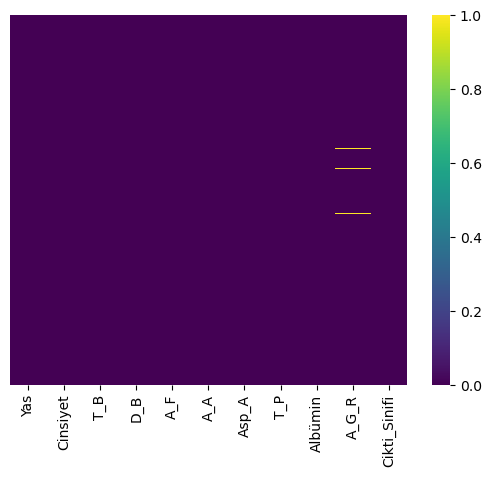

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis") # eksik veri kontrolünün görselleştirilmesi yapıldı.

### 3.3.1. Eksik veri doldurma<a id='3.1'></a>

In [13]:
data['A_G_R'].fillna(data['A_G_R'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Yas           583 non-null    int64  
 1   Cinsiyet      583 non-null    object 
 2   T_B           583 non-null    float64
 3   D_B           583 non-null    float64
 4   A_F           583 non-null    int64  
 5   A_A           583 non-null    int64  
 6   Asp_A         583 non-null    int64  
 7   T_P           583 non-null    float64
 8   Albümin       583 non-null    float64
 9   A_G_R         583 non-null    float64
 10  Cikti_Sinifi  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [14]:
data.isnull().sum()

Yas             0
Cinsiyet        0
T_B             0
D_B             0
A_F             0
A_A             0
Asp_A           0
T_P             0
Albümin         0
A_G_R           0
Cikti_Sinifi    0
dtype: int64

## 3.4.Kategorik Özellikleri Sayısal Forma Dönüştürme<a id='4'></a>

In [15]:
data.dtypes

Yas               int64
Cinsiyet         object
T_B             float64
D_B             float64
A_F               int64
A_A               int64
Asp_A             int64
T_P             float64
Albümin         float64
A_G_R           float64
Cikti_Sinifi      int64
dtype: object

In [16]:
data['Cikti_Sinifi'].value_counts()

1    416
2    167
Name: Cikti_Sinifi, dtype: int64

In [17]:
data["Cinsiyet"]=data["Cinsiyet"].replace('Male',0)
data["Cinsiyet"]=data["Cinsiyet"].replace('Female',1)
data["Cikti_Sinifi"]=data["Cikti_Sinifi"].replace(1,0)
data["Cikti_Sinifi"]=data["Cikti_Sinifi"].replace(2,1)

In [18]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = data['Cikti_Sinifi'].value_counts()/data['Cikti_Sinifi'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Cikti_Sinifi")
fig.show()

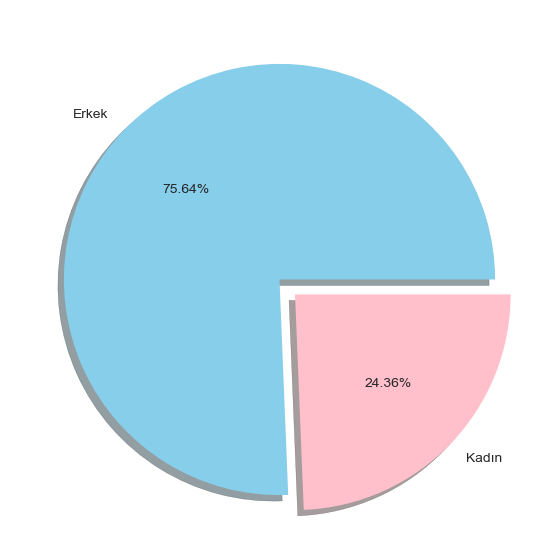

In [19]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=data["Cinsiyet"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Erkek","Kadın"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

## 3.5.Sayısal Özellik Analizi<a id='5'></a>

In [20]:
numeric_list=["Yas","Cinsiyet","T_B","D_B","A_F","A_A","Asp_A","T_P","Albümin","A_G_R","Cikti_Sinifi"]
numeric_list

['Yas',
 'Cinsiyet',
 'T_B',
 'D_B',
 'A_F',
 'A_A',
 'Asp_A',
 'T_P',
 'Albümin',
 'A_G_R',
 'Cikti_Sinifi']

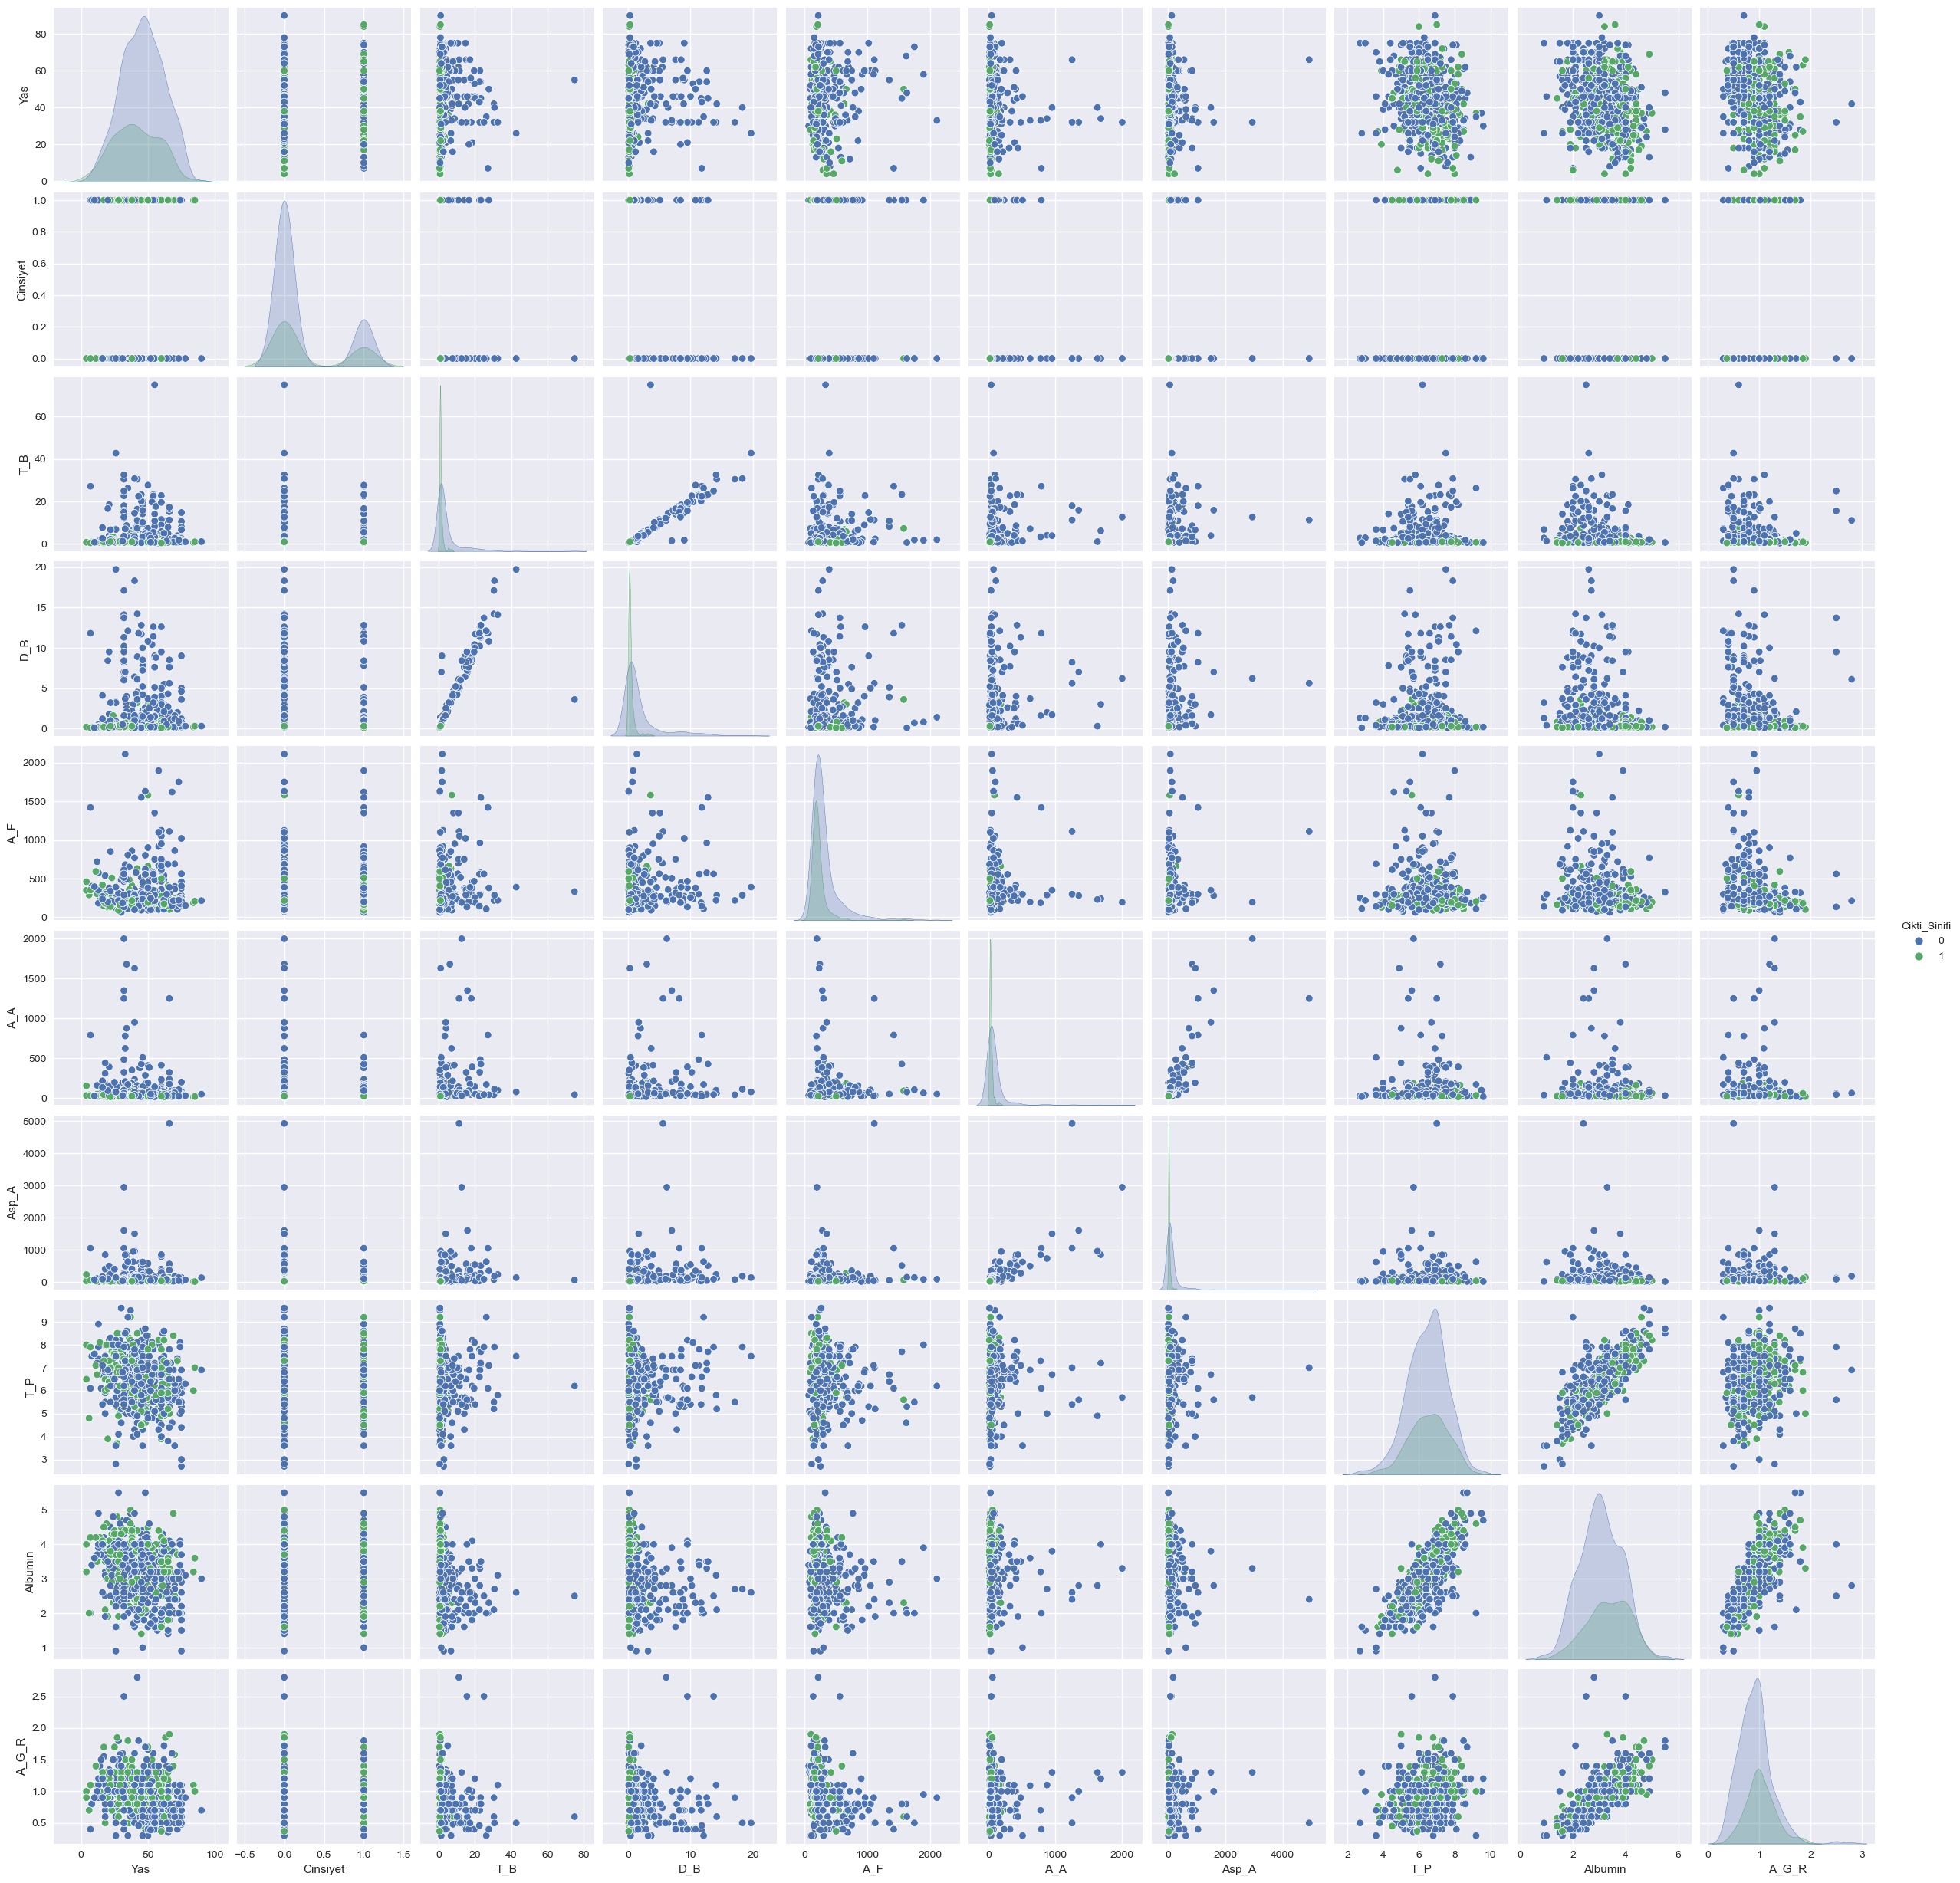

In [21]:
data_numeric=data.loc[:,numeric_list]
sns.pairplot(data_numeric,hue="Cikti_Sinifi",diag_kind="kde")
plt.show()

## 3.6. Standardizasyon <a id='6'></a>

In [22]:
scaler=StandardScaler()

In [23]:
scaled_array=scaler.fit_transform(data[numeric_list[:-1]])
scaled_array

array([[ 1.25209764,  1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504, -0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917, -0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777, -0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [24]:
pd.DataFrame(scaled_array).describe()

0             1             2             3             4  \
count  5.830000e+02  5.830000e+02  5.830000e+02  5.830000e+02  5.830000e+02   
mean   6.741320e-17  1.222578e-16  1.571070e-16  1.437767e-16 -8.379042e-17   
std    1.000859e+00  1.000859e+00  1.000859e+00  1.000859e+00  1.000859e+00   
min   -2.518935e+00 -5.674464e-01 -4.672322e-01 -4.939640e-01 -9.375716e-01   
25%   -7.261488e-01 -5.674464e-01 -4.027597e-01 -4.583272e-01 -4.740928e-01   
50%    1.569364e-02 -5.674464e-01 -3.705234e-01 -4.226904e-01 -3.401989e-01   
75%    8.193562e-01 -5.674464e-01 -1.126334e-01 -6.632235e-02  3.058412e-02   
max    2.797603e+00  1.762281e+00  1.155689e+01  6.490849e+00  7.495683e+00   

                  5             6             7             8             9  
count  5.830000e+02  5.830000e+02  5.830000e+02  5.830000e+02  5.830000e+02  
mean  -3.941958e-17  1.047380e-17  7.603980e-16  2.787936e-16  3.317339e-16  
std    1.000859e+00  1.000859e+00  1.000859e+00  1.000859e+00  1.000859e+00  
min   -3.875487e-01 -3.461066e-01 -3.488354e+00 -2.820521e+00 -2.033394e+00  
25%   -3.163016e-01 -2.941442e-01 -6.299472e-01 -6.817159e-01 -7.763966e-01  
50%   -2.505351e-01 -2.352536e-01  1.077063e-01 -5.265548e-02  1.046660e-15  
75%   -1.107812e-01 -7.936660e-02  6.609463e-01  8.280291e-01  4.806006e-01  
max    1.051873e+01  1.669407e+01  2.873907e+00  2.966834e+00  5.822839e+00

## 3.7. Box Plot Analizi <a id='7'></a>

In [25]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy.head()

Yas  Cinsiyet       T_B       D_B       A_F       A_A     Asp_A  \
0  1.252098  1.762281 -0.418878 -0.493964 -0.426715 -0.354665 -0.318393   
1  1.066637 -0.567446  1.225171  1.430423  1.682629 -0.091599 -0.034333   
2  1.066637 -0.567446  0.644919  0.931508  0.821588 -0.113522 -0.145186   
3  0.819356 -0.567446 -0.370523 -0.387054 -0.447314 -0.365626 -0.311465   
4  1.684839 -0.567446  0.096902  0.183135 -0.393756 -0.294379 -0.176363   

        T_P   Albümin     A_G_R  
0  0.292120  0.198969 -0.147898  
1  0.937566  0.073157 -0.650697  
2  0.476533  0.198969 -0.179323  
3  0.292120  0.324781  0.166351  
4  0.753153 -0.933340 -1.719144

In [26]:
df_dummy=pd.concat([df_dummy,data.loc[:,"Cikti_Sinifi"]],axis=1)
df_dummy.head()

Yas  Cinsiyet       T_B       D_B       A_F       A_A     Asp_A  \
0  1.252098  1.762281 -0.418878 -0.493964 -0.426715 -0.354665 -0.318393   
1  1.066637 -0.567446  1.225171  1.430423  1.682629 -0.091599 -0.034333   
2  1.066637 -0.567446  0.644919  0.931508  0.821588 -0.113522 -0.145186   
3  0.819356 -0.567446 -0.370523 -0.387054 -0.447314 -0.365626 -0.311465   
4  1.684839 -0.567446  0.096902  0.183135 -0.393756 -0.294379 -0.176363   

        T_P   Albümin     A_G_R  Cikti_Sinifi  
0  0.292120  0.198969 -0.147898             0  
1  0.937566  0.073157 -0.650697             0  
2  0.476533  0.198969 -0.179323             0  
3  0.292120  0.324781  0.166351             0  
4  0.753153 -0.933340 -1.719144             0

In [27]:
data_melted = pd.melt(df_dummy, id_vars ="Cikti_Sinifi", var_name = "features", value_name = "value")
data_melted.head(1000)

Cikti_Sinifi  features     value
0               0       Yas  1.252098
1               0       Yas  1.066637
2               0       Yas  1.066637
3               0       Yas  0.819356
4               0       Yas  1.684839
..            ...       ...       ...
995             0  Cinsiyet -0.567446
996             1  Cinsiyet -0.567446
997             1  Cinsiyet -0.567446
998             0  Cinsiyet -0.567446
999             0  Cinsiyet -0.567446

[1000 rows x 3 columns]

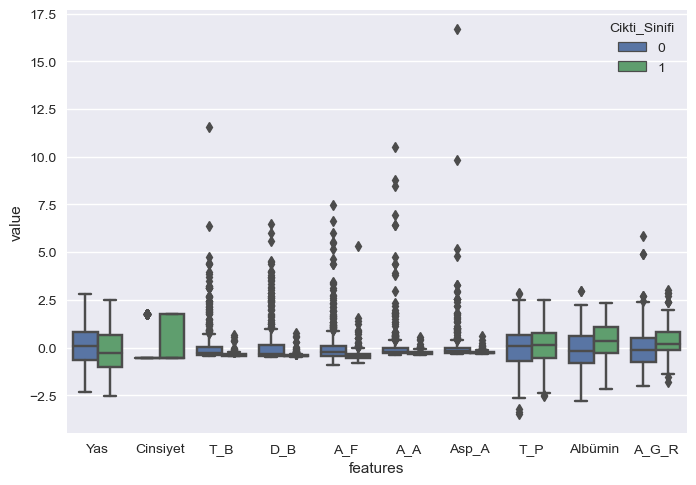

In [28]:
plt.figure()
sns.boxplot(x="features",y="value",hue="Cikti_Sinifi",data=data_melted)
plt.show()

## 3.8. Swarm Analizi <a id='8'></a>

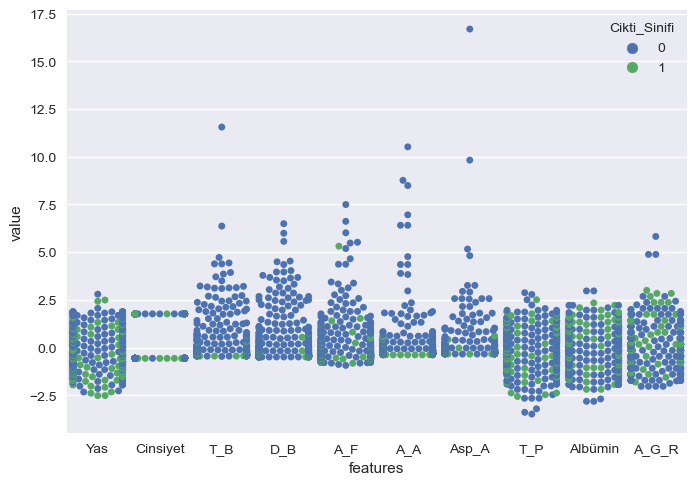

In [29]:
plt.figure()
sns.swarmplot(x="features",y="value", hue="Cikti_Sinifi",data=data_melted)
plt.show()

## 3.9. Korelason Analizi <a id='9'></a>

In [30]:
corr_matrix=data.corr()

<AxesSubplot:>

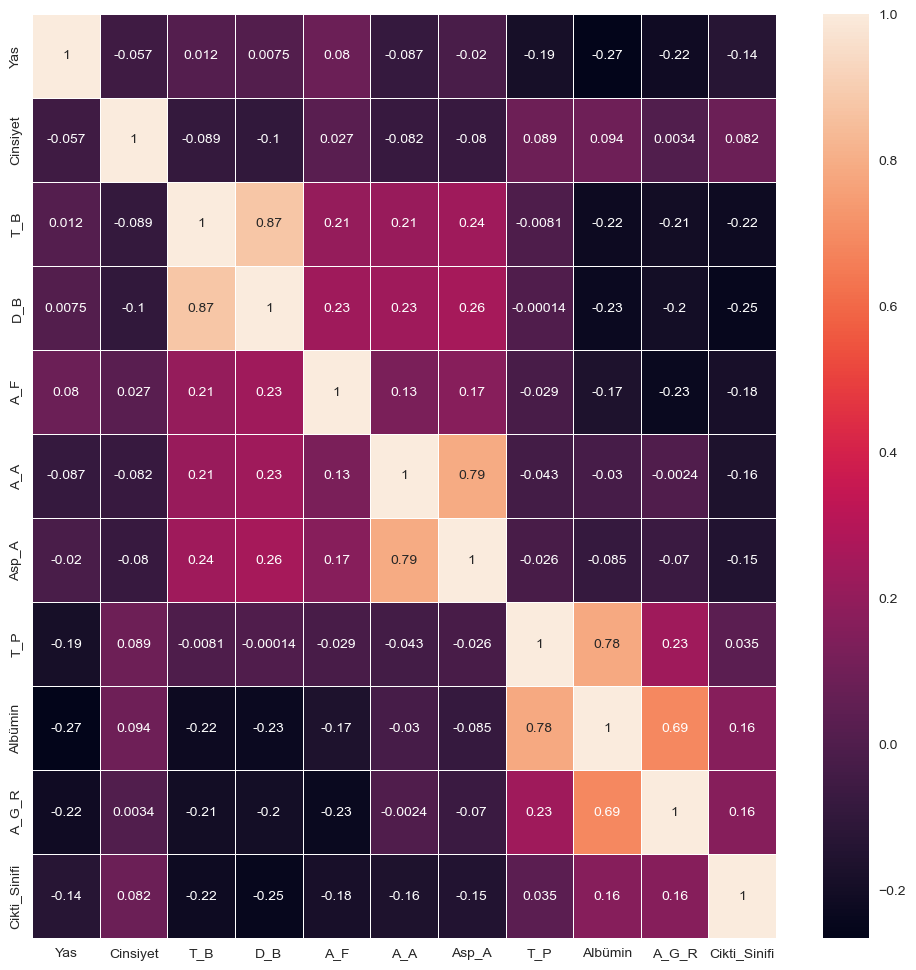

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

In [32]:
corr = data.corr() 
corr.style.background_gradient(cmap='coolwarm')

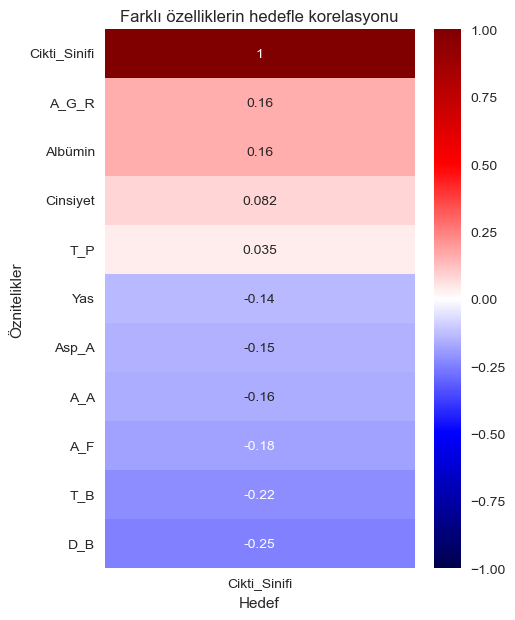

In [33]:
corr_new_train=data.corr()
plt.figure(figsize=(5,7))
sns.heatmap(corr_new_train[['Cikti_Sinifi']].sort_values(by=['Cikti_Sinifi'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
plt.ylabel('Öznitelikler')
plt.xlabel('Hedef')
plt.title("Farklı özelliklerin hedefle korelasyonu")
plt.show()

In [34]:
feature_names=data.corr().nlargest(4,'Cikti_Sinifi').index.tolist()

In [35]:
def show_corr(data, target_name, n_most=None):
    if n_most is None:
        n_most=len(data.columns.values)-1
    corr_matrix=data.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
       
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title("{} İle En Yüksek Korelasyona Sahip Özellikler".format(target_name))

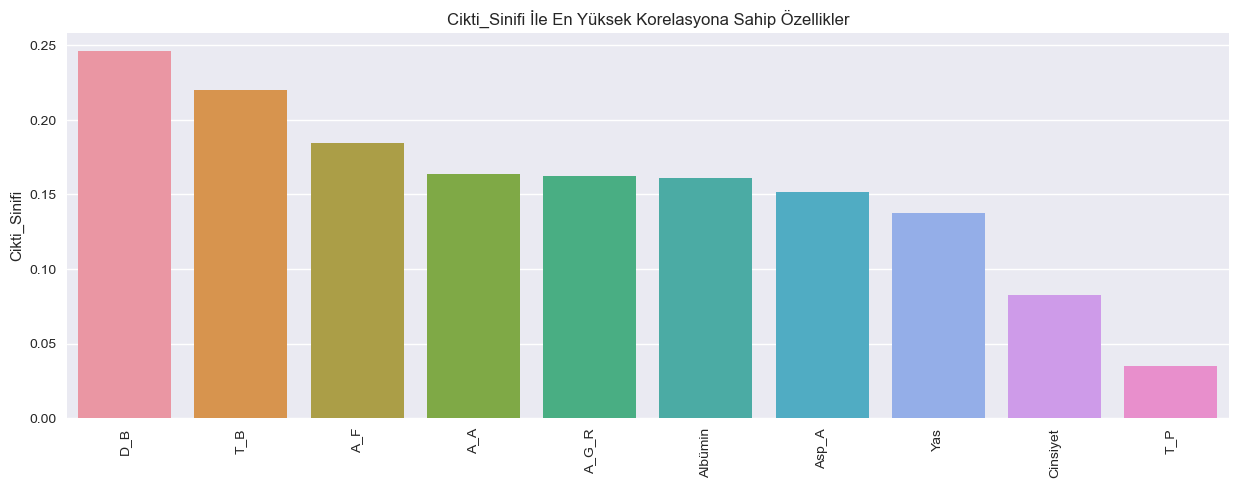

In [36]:
show_corr(data=data, target_name='Cikti_Sinifi')

# 4.Modelleme<a id='d'></a>
   1. [Ölçekleme(Scalling)](#4.1)
   2. [Eğitim/Test Ayrımı(Train/Test Split)](#4.2)
   3. [Logistic Regression](#4.3)
       1. [Logistic Regression Confusion Matrix](#4.3.1)
       2. [Roc Curve Analizi](#4.3.2)
   4. [Gaussian Naive Bayes](#4.4)
       1. [Gaussian Naive Bayes Confusion Matrix](#4.4.1)
       2. [Gaussian Naive Bayes Roc Curve Analizi](#4.4.2)
   5. [KNN](#4.5)
       1. [KNN Model Tuning](#4.5.1)
       1. [KNN Confusion Matrix](#4.5.2)
   6. [SVM](#4.6)
       1. [SVM Model Tuning](#4.6.1)
       1. [SVM Confusion Matrix](#4.6.2)
   7. [Yapay Sinir Ağları](#4.7)
       1. [YSA Model Tuning](#4.7.1)
       1. [YSA Confusion Matrix](#4.7.2)
   8. [Random Forest Algoritması ve Özellik Seçimi](#4.8) 
       1. [Random Forest Confusion Matrix](#4.8.1)
   9. [Random Forest  Ağaç Yapısı Görselleştirmesi](#4.9)
   10. [Etkin Özelliğe Göre Sınıflandırma](#4.10)
   11. [Tüm Modellerin Karşılaştırılması](#4.11)
   12. [Algoritmaların Çalışma Zamanı Karşılaştırılması](#4.12)      

In [37]:
df=data.copy()

In [38]:
df.head()

Yas  Cinsiyet   T_B  D_B  A_F  A_A  Asp_A  T_P  Albümin  A_G_R  \
0   65         1   0.7  0.1  187   16     18  6.8      3.3   0.90   
1   62         0  10.9  5.5  699   64    100  7.5      3.2   0.74   
2   62         0   7.3  4.1  490   60     68  7.0      3.3   0.89   
3   58         0   1.0  0.4  182   14     20  6.8      3.4   1.00   
4   72         0   3.9  2.0  195   27     59  7.3      2.4   0.40   

   Cikti_Sinifi  
0             0  
1             0  
2             0  
3             0  
4             0

In [39]:
x=df.drop(['Cikti_Sinifi'],axis=1)

In [40]:
y=df[["Cikti_Sinifi"]]

In [41]:
x.head()

Yas  Cinsiyet   T_B  D_B  A_F  A_A  Asp_A  T_P  Albümin  A_G_R
0   65         1   0.7  0.1  187   16     18  6.8      3.3   0.90
1   62         0  10.9  5.5  699   64    100  7.5      3.2   0.74
2   62         0   7.3  4.1  490   60     68  7.0      3.3   0.89
3   58         0   1.0  0.4  182   14     20  6.8      3.4   1.00
4   72         0   3.9  2.0  195   27     59  7.3      2.4   0.40

In [42]:
y.head()

Cikti_Sinifi
0             0
1             0
2             0
3             0
4             0

## 4.1. Ölçekleme(Scalling)<a id='4.1'></a>

In [43]:
scaler=StandardScaler()
scaler

StandardScaler()

In [44]:
x[numeric_list[:-1]] = scaled_array=scaler.fit_transform(x[numeric_list[:-1]])

In [45]:
x.head()

Yas  Cinsiyet       T_B       D_B       A_F       A_A     Asp_A  \
0  1.252098  1.762281 -0.418878 -0.493964 -0.426715 -0.354665 -0.318393   
1  1.066637 -0.567446  1.225171  1.430423  1.682629 -0.091599 -0.034333   
2  1.066637 -0.567446  0.644919  0.931508  0.821588 -0.113522 -0.145186   
3  0.819356 -0.567446 -0.370523 -0.387054 -0.447314 -0.365626 -0.311465   
4  1.684839 -0.567446  0.096902  0.183135 -0.393756 -0.294379 -0.176363   

        T_P   Albümin     A_G_R  
0  0.292120  0.198969 -0.147898  
1  0.937566  0.073157 -0.650697  
2  0.476533  0.198969 -0.179323  
3  0.292120  0.324781  0.166351  
4  0.753153 -0.933340 -1.719144

## 4.2.Eğitim/Test Ayrımı (Train/Test Split)<a id='4.2'></a>

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
print("X_train: {}".format(x_train.shape))

X_train: (466, 10)


In [48]:
print("X_test: {}".format(x_test.shape))

X_test: (117, 10)


In [49]:
print("y_train: {}".format(y_train.shape))

y_train: (466, 1)


In [50]:
print("y_test: {}".format(y_test.shape)) 

y_test: (117, 1)


In [51]:
x_train

Yas  Cinsiyet       T_B       D_B       A_F       A_A     Asp_A  \
77   1.437558  1.762281 -0.434996 -0.493964  5.476975  0.078298  0.059200   
581 -0.849789 -0.567446 -0.322169 -0.351417 -0.439074 -0.283418 -0.269895   
210 -1.035250 -0.567446 -0.402760 -0.422690 -0.414356 -0.332743 -0.332250   
192  0.942997 -0.567446 -0.160988 -0.315780 -0.076531 -0.009391 -0.204076   
449  0.201154  1.762281 -0.386642 -0.458327 -0.484392 -0.299860 -0.287216   
..        ...       ...       ...       ...       ...       ...       ...   
71   1.870300  1.762281 -0.402760 -0.458327 -0.422595 -0.332743 -0.280288   
106 -0.540688 -0.567446  0.322556  0.290046 -0.599747 -0.266977 -0.062046   
270 -0.478868 -0.567446 -0.418878 -0.458327 -0.228964  0.083778 -0.193684   
435 -1.715272  1.762281 -0.451114 -0.493964 -0.348439 -0.288899 -0.308001   
102 -1.715272 -0.567446 -0.386642 -0.458327 -0.274282 -0.245055 -0.224861   

          T_P   Albümin     A_G_R  
77  -1.736427 -1.310776 -0.462147  
581  0.292120  0.324781  0.166351  
210 -2.197461 -0.933340  1.423348  
192  0.107706  0.450593  0.480601  
449 -0.261120 -0.052655  0.166351  
..        ...       ...       ...  
71  -1.920841 -1.688212 -1.090646  
106 -1.275394 -0.681716  0.166351  
270  2.781700  2.211962  0.166351  
435  0.568740  1.708714  2.366096  
102  0.384326  1.331277  1.894722  

[466 rows x 10 columns]

In [52]:
x_test

Yas  Cinsiyet       T_B       D_B       A_F       A_A     Asp_A  \
355 -1.591632 -0.567446 -0.306051 -0.244506 -0.463793 -0.371107 -0.290680   
407 -2.024373 -0.567446 -0.370523 -0.458327  1.765025  0.418091 -0.006619   
90   0.942997 -0.567446  0.387029  0.468230 -0.315480  1.815630  2.563784   
402 -0.169767  1.762281 -0.451114 -0.493964 -0.529710  0.407130 -0.006619   
268 -0.293407 -0.567446  1.805424  1.751155  0.277773 -0.168327 -0.120936   
..        ...       ...       ...       ...       ...       ...       ...   
516  0.942997 -0.567446 -0.386642 -0.422690 -0.504991 -0.354665 -0.297608   
305  0.572075  1.762281 -0.306051 -0.280143 -0.393756 -0.245055 -0.325322   
167  0.139334  1.762281 -0.048161  0.004951  0.005865 -0.091599 -0.148650   
312 -1.097070 -0.567446 -0.322169 -0.315780 -0.760420 -0.305341 -0.193684   
329 -1.467991 -0.567446 -0.418878 -0.458327 -0.327839 -0.365626 -0.301073   

          T_P   Albümin         A_G_R  
355  1.398600  1.834526  1.109099e+00  
407  0.660946  0.702217  1.663513e-01  
90   0.753153  0.073157 -5.249971e-01  
402  1.490806  1.079653 -1.478980e-01  
268 -0.722154 -1.310776 -1.404895e+00  
..        ...       ...           ...  
516  0.199913 -0.178468 -4.621473e-01  
305  1.306393  0.702217 -1.478980e-01  
167 -0.814361 -1.688212 -1.499170e+00  
312  1.859633  2.086150  1.046660e-15  
329  0.753153  1.205465  7.948499e-01  

[117 rows x 10 columns]

In [53]:
y_train

Cikti_Sinifi
77              0
581             0
210             0
192             0
449             0
..            ...
71              0
106             1
270             0
435             1
102             0

[466 rows x 1 columns]

In [54]:
y_test

Cikti_Sinifi
355             1
407             0
90              0
402             0
268             0
..            ...
516             0
305             1
167             0
312             1
329             1

[117 rows x 1 columns]

## 4.3.Logistic Regression<a id='4.3'></a>

In [55]:
df

Yas  Cinsiyet   T_B  D_B  A_F  A_A  Asp_A  T_P  Albümin  A_G_R  \
0     65         1   0.7  0.1  187   16     18  6.8      3.3   0.90   
1     62         0  10.9  5.5  699   64    100  7.5      3.2   0.74   
2     62         0   7.3  4.1  490   60     68  7.0      3.3   0.89   
3     58         0   1.0  0.4  182   14     20  6.8      3.4   1.00   
4     72         0   3.9  2.0  195   27     59  7.3      2.4   0.40   
..   ...       ...   ...  ...  ...  ...    ...  ...      ...    ...   
578   60         0   0.5  0.1  500   20     34  5.9      1.6   0.37   
579   40         0   0.6  0.1   98   35     31  6.0      3.2   1.10   
580   52         0   0.8  0.2  245   48     49  6.4      3.2   1.00   
581   31         0   1.3  0.5  184   29     32  6.8      3.4   1.00   
582   38         0   1.0  0.3  216   21     24  7.3      4.4   1.50   

     Cikti_Sinifi  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
578             1  
579             0  
580             0  
581             0  
582             1  

[583 rows x 11 columns]

In [56]:
df["Cikti_Sinifi"].value_counts()

0    416
1    167
Name: Cikti_Sinifi, dtype: int64

<AxesSubplot:>

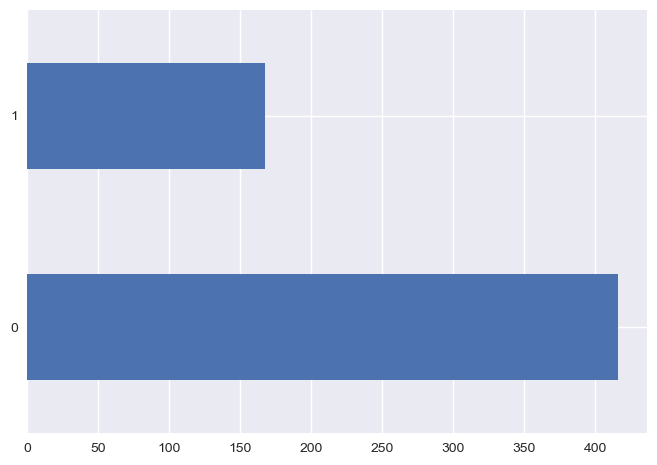

In [57]:
df["Cikti_Sinifi"].value_counts().plot.barh()

In [58]:
log_model = LogisticRegression()

In [59]:
lr0=time()
log_model.fit(x_train, y_train)
lr_time=time()-lr0
y_pred_log = log_model.predict(x_test)

In [60]:
y_pred_prob_log = log_model.predict_proba(x_test)
y_pred_prob_log

array([[4.69529877e-01, 5.30470123e-01],
       [8.35535329e-01, 1.64464671e-01],
       [9.98266407e-01, 1.73359323e-03],
       [7.48851135e-01, 2.51148865e-01],
       [9.72773080e-01, 2.72269196e-02],
       [6.54178511e-01, 3.45821489e-01],
       [4.57313925e-01, 5.42686075e-01],
       [6.49230788e-01, 3.50769212e-01],
       [4.32448586e-01, 5.67551414e-01],
       [8.29925139e-01, 1.70074861e-01],
       [6.13649702e-01, 3.86350298e-01],
       [7.98574900e-01, 2.01425100e-01],
       [5.46678481e-01, 4.53321519e-01],
       [5.94107339e-01, 4.05892661e-01],
       [9.91315075e-01, 8.68492505e-03],
       [9.03563940e-01, 9.64360604e-02],
       [6.63720945e-01, 3.36279055e-01],
       [6.20885531e-01, 3.79114469e-01],
       [8.47275086e-01, 1.52724914e-01],
       [7.31316857e-01, 2.68683143e-01],
       [6.80019093e-01, 3.19980907e-01],
       [6.98539170e-01, 3.01460830e-01],
       [9.53604864e-01, 4.63951364e-02],
       [7.59132271e-01, 2.40867729e-01],
       [8.513713

In [61]:
y_pred_log=np.argmax(y_pred_prob_log, axis=1)

In [62]:
y_pred_log

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [63]:
lr_acc=accuracy_score(y_test,y_pred_log)
lr_acc

0.7606837606837606

In [64]:
log_model.coef_

array([[-0.23334226,  0.08462393, -0.26290902, -0.87900792, -0.37231067,
        -1.06165254, -0.74387556, -0.72457412,  0.91081155, -0.34210859]])

In [65]:
log_acc_CV=cross_val_score(log_model,x_test,y_test, cv = 10).mean()
log_acc_CV

0.7333333333333334

## 4.3.1. Lojistic Regression Confusion Matrix<a id='4.3.1'></a>

In [66]:
confusion_matrix(y_true=y_test,y_pred=y_pred_log)

array([[80,  7],
       [21,  9]], dtype=int64)

In [67]:
accuracy_score(y_true=y_test,y_pred=y_pred_log)

0.7606837606837606

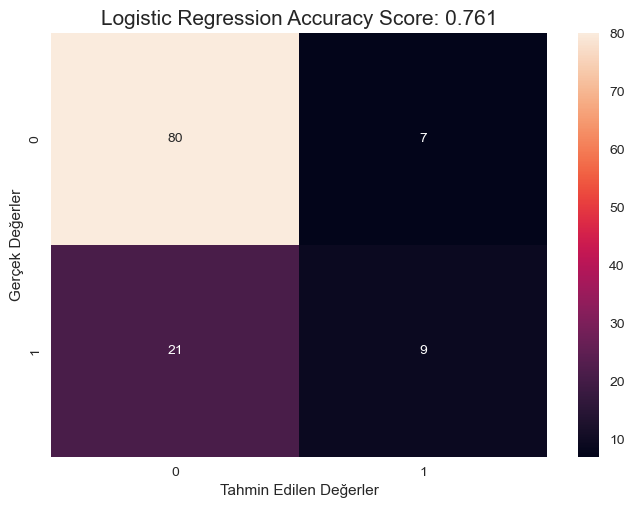

In [68]:
predictions_lr = log_model.predict(x_test)
score = round(accuracy_score(y_test, predictions_lr), 3)
cm_lr = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm_lr, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Logistic Regression Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [69]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        87
           1       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117



* **Accuracy** = Doğru Tahminlerin Sayısı / Tüm Tahminlerin Sayısı

* **Precision** = Pozitif olarak tahmin edilenlerin gerçekte kaçta kaçı doğru.
* **Precision** = TP /(TP+FP)

* **Recall** = Model, pozitif classların kaçta kaçını yakalayabiliyor.
* **Recall** = TP / (TP+FN)

* **F1 Score**,Precision ve Recall değerlerinin ağırlıklı (harmonik) ortalamasıdır.
* **F1 Score** = 2 * (Recall * Precision) / (Recall+ Precision)


## 4.3.2. Lojistic Regression ROC Curve Analizi  <a id='4.3.2'></a>

In [70]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_log[:,1])

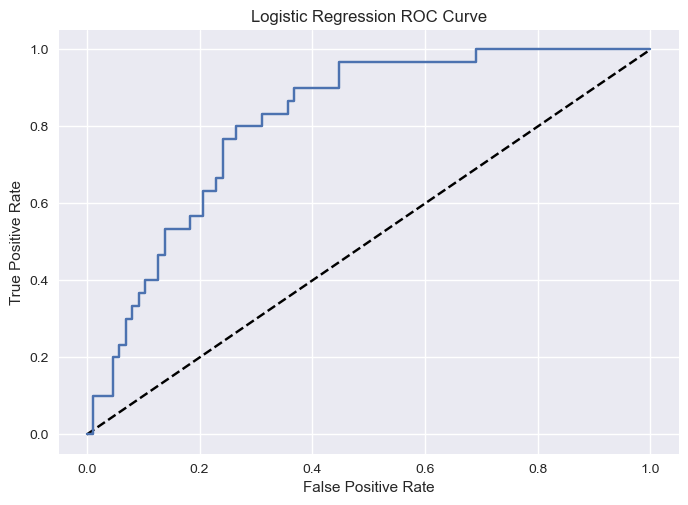

In [71]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## 4.3.3. Lojistic Regression En iyi Parametre Ayarı  <a id='4.3.3'></a>

In [72]:
log_tuned = LogisticRegression()
log_tuned.fit(x_train,y_train)

logisticReg_params = {"max_iter": [1,10,20,30,40,50,100],
                        "multi_class": ['auto', 'ovr', 'multinomial'],
                        "C":np.arange(1,10,1),
                     "solver":['liblinear', 'sag']}

logisticReg_model = GridSearchCV(log_tuned, logisticReg_params, cv=10)
logisticReg_model.fit(x_train, y_train)
print("En iyi parametreler: ", logisticReg_model.best_params_)

En iyi parametreler:  {'C': 7, 'max_iter': 10, 'multi_class': 'auto', 'solver': 'liblinear'}


In [73]:
logisticReg_hyper_tuned = LogisticRegression(C = 7, max_iter = 1, multi_class = 'multinomial', solver='sag')
logisticReg_hyper_tuned.fit(x_train, y_train)
y_pred_log_tuned = logisticReg_hyper_tuned.predict(x_test)
y_pred_prob_tuned_log = log_tuned.predict_proba(x_test)
y_pred_log_tuned=np.argmax(y_pred_prob_tuned_log, axis=1)
print("Test accuracy: {}".format(accuracy_score(y_test,y_pred_log_tuned)))

Test accuracy: 0.7606837606837606


## 4.4. Gaussian Naive Bayes<a id='4.4'></a>

In [74]:
df

Yas  Cinsiyet   T_B  D_B  A_F  A_A  Asp_A  T_P  Albümin  A_G_R  \
0     65         1   0.7  0.1  187   16     18  6.8      3.3   0.90   
1     62         0  10.9  5.5  699   64    100  7.5      3.2   0.74   
2     62         0   7.3  4.1  490   60     68  7.0      3.3   0.89   
3     58         0   1.0  0.4  182   14     20  6.8      3.4   1.00   
4     72         0   3.9  2.0  195   27     59  7.3      2.4   0.40   
..   ...       ...   ...  ...  ...  ...    ...  ...      ...    ...   
578   60         0   0.5  0.1  500   20     34  5.9      1.6   0.37   
579   40         0   0.6  0.1   98   35     31  6.0      3.2   1.10   
580   52         0   0.8  0.2  245   48     49  6.4      3.2   1.00   
581   31         0   1.3  0.5  184   29     32  6.8      3.4   1.00   
582   38         0   1.0  0.3  216   21     24  7.3      4.4   1.50   

     Cikti_Sinifi  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
578             1  
579             0  
580             0  
581             0  
582             1  

[583 rows x 11 columns]

In [75]:
nb = GaussianNB()
nb0=time()
nb_model = nb.fit(x_train,y_train)
nb_time=time()-nb0
nb_model

GaussianNB()

In [76]:
nb_model.predict(x_test)[0:10] #tahmin değerleri

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
y_pred_prob_nb=nb_model.predict_proba(x_test) #olasılık değerleri
y_pred_prob_nb

array([[2.02275566e-004, 9.99797724e-001],
       [9.99264141e-001, 7.35859111e-004],
       [1.00000000e+000, 1.00271751e-138],
       [9.12689602e-001, 8.73103983e-002],
       [1.00000000e+000, 4.95084926e-055],
       [4.10326439e-004, 9.99589674e-001],
       [4.56318616e-004, 9.99543681e-001],
       [4.19619304e-004, 9.99580381e-001],
       [5.98346681e-005, 9.99940165e-001],
       [2.66841663e-003, 9.97331583e-001],
       [5.63930320e-004, 9.99436070e-001],
       [1.00000000e+000, 2.43338083e-019],
       [3.50972767e-004, 9.99649027e-001],
       [3.59520682e-004, 9.99640479e-001],
       [1.00000000e+000, 3.54542345e-039],
       [9.99364741e-001, 6.35259497e-004],
       [2.05604744e-004, 9.99794395e-001],
       [1.24193595e-003, 9.98758064e-001],
       [1.24528972e-002, 9.87547103e-001],
       [2.94924606e-002, 9.70507539e-001],
       [6.60318189e-004, 9.99339682e-001],
       [1.02941991e-003, 9.98970580e-001],
       [1.00000000e+000, 1.50425218e-014],
       [1.3

In [78]:
y_pred_nb = nb_model.predict(x_test) #test hatasını hesapladık

In [79]:
nb_acc = accuracy_score(y_test, y_pred_nb)
nb_acc

0.5128205128205128

In [80]:
nb_acc_CV=cross_val_score(nb_model,x_test,y_test, cv = 10).mean()
nb_acc_CV

0.6659090909090908

## 4.4.1. Gaussian Naive Bayes Confusion Matrix<a id='4.4.1'></a>

In [81]:
confusion_matrix(y_true=y_test,y_pred=y_pred_nb)

array([[30, 57],
       [ 0, 30]], dtype=int64)

In [82]:
accuracy_score(y_true=y_test,y_pred=y_pred_nb)

0.5128205128205128

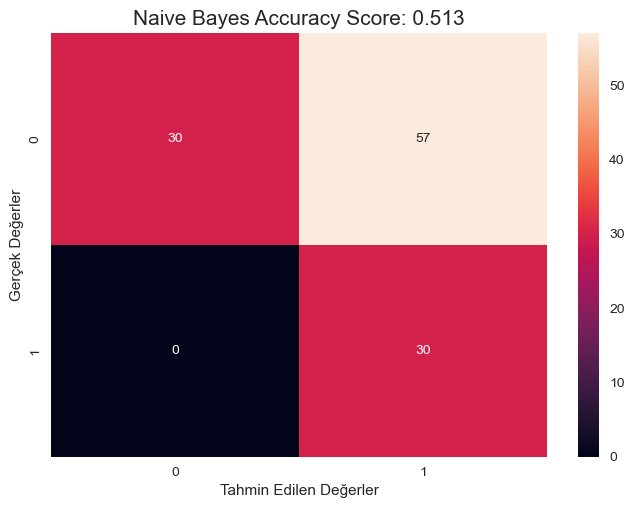

In [83]:
predictions_nb = nb_model.predict(x_test)
score = round(accuracy_score(y_test, predictions_nb), 3)
cm_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm_nb, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Naive Bayes Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [84]:
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        87
           1       0.34      1.00      0.51        30

    accuracy                           0.51       117
   macro avg       0.67      0.67      0.51       117
weighted avg       0.83      0.51      0.51       117



## 4.4.2. Gaussian Naive Bayes ROC Curve Analizi  <a id='4.4.2'></a>

In [85]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_nb[:,1])

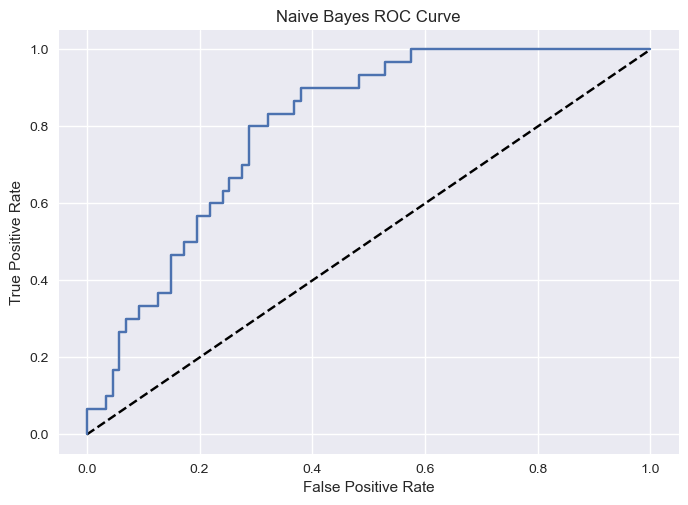

In [86]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Naive Byes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()

## 4.5. KNN <a id='4.5'></a>

In [87]:
knn = KNeighborsClassifier()
knn0=time()
knn_model = knn.fit(x_train,y_train)
knn_time=time()-knn0
knn_model

KNeighborsClassifier()

In [88]:
y_pred_knn = knn_model.predict(x_test)

In [89]:
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_acc

0.6666666666666666

In [90]:
knn_acc_CV=cross_val_score(knn_model,x_test,y_test, cv = 10).mean()
knn_acc_CV

0.7416666666666666

In [91]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        87
           1       0.38      0.50      0.43        30

    accuracy                           0.67       117
   macro avg       0.60      0.61      0.60       117
weighted avg       0.70      0.67      0.68       117



## 4.5.1. KNN Model Tuning<a id='4.5.1'></a>

In [92]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [93]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [94]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.7017576318223867
En iyi parametreler: {'n_neighbors': 48}


In [95]:
knn = KNeighborsClassifier(2)
knntuned0=time()
knn_tuned = knn.fit(x_train,y_train)
knn_tuned_time=time()-knntuned0

In [96]:
knn_tuned.score(x_test,y_test)

0.7606837606837606

In [97]:
y_pred_knn = knn_tuned.predict(x_test)

In [98]:
knn_tuned_acc=accuracy_score(y_test,y_pred_knn)
knn_tuned_acc

0.7606837606837606

## 4.5.2. KNN Confusion Matrix<a id='4.5.2'></a>

In [99]:
confusion_matrix(y_true=y_test,y_pred=y_pred_knn)

array([[83,  4],
       [24,  6]], dtype=int64)

In [100]:
accuracy_score(y_true=y_test,y_pred=y_pred_knn)

0.7606837606837606

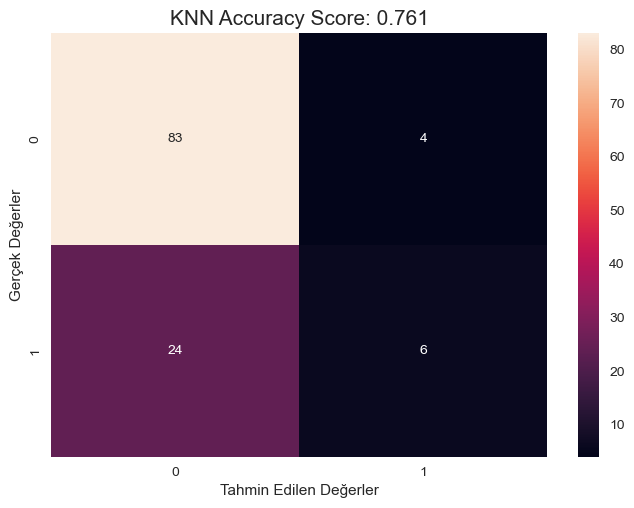

In [101]:
predictions_knn = knn_tuned.predict(x_test)
score = round(accuracy_score(y_test, predictions_knn), 3)
cm_knn = confusion_matrix(y_test, predictions_knn)
sns.heatmap(cm_knn, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('KNN Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [102]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        87
           1       0.60      0.20      0.30        30

    accuracy                           0.76       117
   macro avg       0.69      0.58      0.58       117
weighted avg       0.73      0.76      0.71       117



## 4.6. SVM <a id='4.6'></a>

In [103]:
svm0=time()
svm_model = SVC(kernel = "linear").fit(x_train,y_train)
svm_time=time()-svm0

In [104]:
svm_model

SVC(kernel='linear')

In [105]:
y_pred_svm = svm_model.predict(x_test)

In [106]:
svm_acc=accuracy_score(y_test,y_pred_svm)
svm_acc

0.7435897435897436

In [107]:
svm_acc_CV=cross_val_score(svm_model,x_test,y_test, cv = 10).mean()
svm_acc_CV

0.7166666666666668

## 4.6.1. SVM Model Tuning<a id='4.6.1'></a>

In [108]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svmtuned0=time()
svc_cv_model.fit(x_train,y_train)
svm_tuned_time=time()-svmtuned0

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [109]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [110]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(x_train, y_train)

In [111]:
y_pred_svm_tuned = svc_tuned.predict(x_test)
svm_tuned_acc=accuracy_score(y_test, y_pred_svm_tuned)
svm_tuned_acc

0.7435897435897436

## 4.6.2. SVM Confusion Matrix<a id='4.6.2'></a>

In [112]:
confusion_matrix(y_true=y_test,y_pred=y_pred_svm_tuned)

array([[87,  0],
       [30,  0]], dtype=int64)

In [113]:
accuracy_score(y_true=y_test,y_pred=y_pred_svm_tuned)

0.7435897435897436

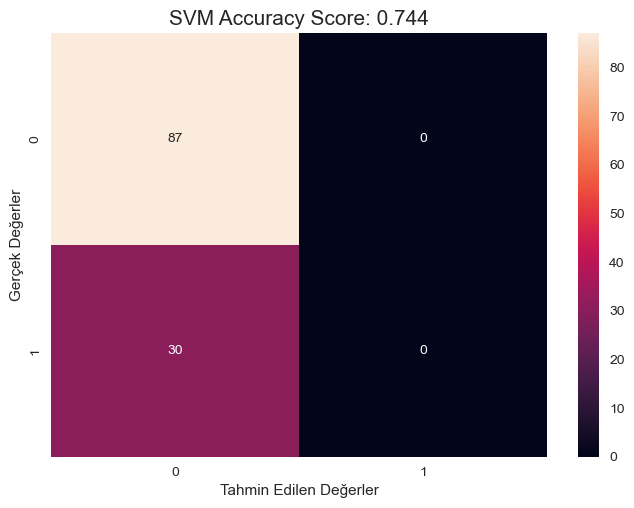

In [114]:
predictions_svm = svc_tuned.predict(x_test)
score = round(accuracy_score(y_test, predictions_svm), 3)
cm_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(cm_svm, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('SVM Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [115]:
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        87
           1       0.00      0.00      0.00        30

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



## 4.7. Yapay Sinir Ağları(Artificial Neural Network) <a id='4.7'></a>

In [116]:
scaler = StandardScaler()

In [117]:
scaler.fit(x_train)
ysa_x_train_scaled = scaler.transform(x_train)
ysa_x_test_scaled = scaler.transform(x_test)

In [118]:
ysa_x_test_scaled[0:5]

array([[-1.61274317, -0.55586758, -0.30312285, -0.24266056, -0.45721945,
        -0.36230876, -0.28848698,  1.37812659,  1.81683767,  1.05136154],
       [-2.06050623, -0.55586758, -0.36632431, -0.45915032,  1.75139843,
         0.36992528, -0.02707067,  0.64165068,  0.68107717,  0.12861591],
       [ 1.00986905, -0.55586758,  0.37629278,  0.47897199, -0.31025042,
         1.66658973,  2.33842812,  0.73371017,  0.05009912, -0.54806423],
       [-0.14152168,  1.79898962, -0.44532613, -0.49523195, -0.52253902,
         0.35975537, -0.02707067,  1.47018607,  1.05966401, -0.17896597],
       [-0.26945398, -0.55586758,  1.76672477,  1.77791058,  0.27762568,
        -0.17416529, -0.13227479, -0.73924164, -1.33805261, -1.40929349]])

In [119]:
ysa0=time()
mlpc = MLPClassifier().fit(ysa_x_train_scaled, y_train)
ysa_time=time()-ysa0

In [120]:
y_pred_ysa = mlpc.predict(ysa_x_test_scaled)
ysa_acc=accuracy_score(y_test, y_pred_ysa)
ysa_acc

0.7435897435897436

In [121]:
ysa_acc_CV=cross_val_score(mlpc,x_test,y_test, cv = 10).mean()
ysa_acc_CV

0.725

## 4.7.1. YSA Model Tuning<a id='4.7.1'></a>

In [122]:
mlpc

MLPClassifier()

In [123]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [124]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)
ysatuned0=time()
mlpc_cv_model.fit(ysa_x_train_scaled, y_train)
ysa_tuned_time=time()-ysatuned0

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [125]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}


In [126]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100),
                          solver = "adam")

In [127]:
mlpc_tuned.fit(ysa_x_train_scaled, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100))

In [128]:
y_pred_ysa_tuned = mlpc_tuned.predict(ysa_x_test_scaled)
ysa_tuned_acc=accuracy_score(y_test, y_pred_ysa)
ysa_tuned_acc

0.7435897435897436

## 4.7.2. YSA Confusion Matrix<a id='4.7.2'></a>

In [129]:
confusion_matrix(y_true=y_test,y_pred=y_pred_ysa_tuned)

array([[73, 14],
       [10, 20]], dtype=int64)

In [130]:
accuracy_score(y_true=y_test,y_pred=y_pred_ysa_tuned)

0.7948717948717948

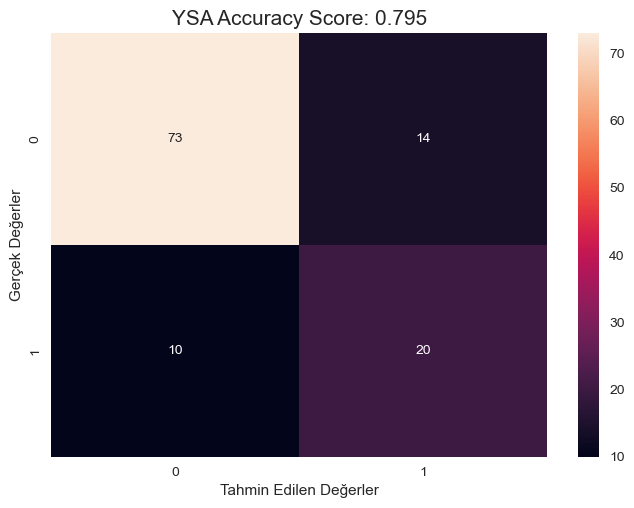

In [131]:
predictions_ysa = mlpc_tuned.predict(x_test)
score = round(accuracy_score(y_test, predictions_ysa), 3)
cm_ysa = confusion_matrix(y_test, predictions_ysa)
sns.heatmap(cm_ysa, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('YSA Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [132]:
print(classification_report(y_test, predictions_ysa))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        87
           1       0.59      0.67      0.62        30

    accuracy                           0.79       117
   macro avg       0.73      0.75      0.74       117
weighted avg       0.80      0.79      0.80       117



## 4.8. Random Forest Algoritması ve Öznitelik Seçimi<a id='4.8'></a>

In [133]:
rf0=time()
rf_model=RandomForestClassifier().fit(x_train,y_train)
rf_time=time()-rf0

In [134]:
rf_model

RandomForestClassifier()

In [135]:
y_pred_rf=rf_model.predict(x_test)

In [136]:
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_acc

0.7350427350427351

In [137]:
rf_acc_CV=cross_val_score(rf_model,x_test,y_test, cv = 10).mean()
rf_acc_CV

0.7356060606060607

## 4.8.1. Random Forest Model Tuning<a id='4.8.1'></a>

In [138]:
rf_params={"max_depth":[2,5,8,10],
           "max_features":[2,5,8],   
           "n_estimators":[10,500,1000],
           "min_samples_split":[2,5,10]
          }

In [139]:
rf_model=RandomForestClassifier()

In [140]:
rf_cv_model=GridSearchCV(rf_model,
                         rf_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=2
                        )

In [141]:
rf_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [142]:
print("En İyi Parametreler:"+str(rf_cv_model.best_params_))

En İyi Parametreler:{'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [143]:
rf_tuned=RandomForestClassifier(max_depth=10,
                                max_features=8,
                                min_samples_split=5,
                                n_estimators=500
                               )

In [144]:
rf_tuned0=time()
rf_tuned.fit(x_train,y_train)
rf_tuned_time=time()-rf_tuned0

In [145]:
y_pred_rf=rf_tuned.predict(x_test)
rf_tuned_acc=accuracy_score(y_test,y_pred_rf)
rf_tuned_acc

0.7606837606837606

## 4.8.2. Random Forest Confusion Matrix<a id='4.8.2'></a>

In [146]:
confusion_matrix(y_true=y_test,y_pred=y_pred_rf)

array([[75, 12],
       [16, 14]], dtype=int64)

In [147]:
accuracy_score(y_true=y_test,y_pred=y_pred_rf)

0.7606837606837606

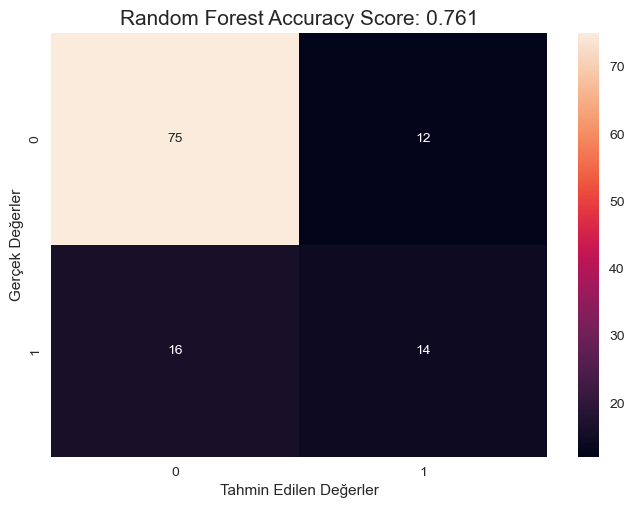

In [148]:
predictions_rf = rf_tuned.predict(x_test)
score = round(accuracy_score(y_test, predictions_rf), 3)
cm_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm_rf, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Random Forest Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [149]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        87
           1       0.54      0.47      0.50        30

    accuracy                           0.76       117
   macro avg       0.68      0.66      0.67       117
weighted avg       0.75      0.76      0.75       117



## 4.9. Random Forest  Ağaç Yapısı Görselleştirmesi <a id='4.9'></a>

In [150]:
d_tree99 = rf_tuned.estimators_[99]
dot_data = StringIO()
export_graphviz(d_tree99, feature_names = x.columns,
               out_file = dot_data, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0b#\x00\x00\x05\xbc\x08\x06\x00\x00\x00\x83\xf0\xbf…

In [151]:
Importance = pd.DataFrame({"Önem": d_tree99.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

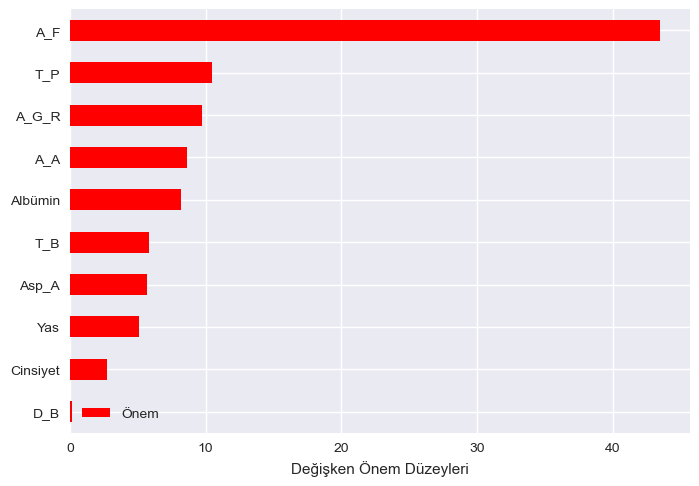

In [152]:
Importance.sort_values(by = "Önem", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## 4.10. Etkin Özelliğe Göre Sınıflandırma <a id='4.10'></a>

In [153]:
data=pd.concat([x,df.loc[:,"Cikti_Sinifi"]],axis=1)
data.head()

Yas  Cinsiyet       T_B       D_B       A_F       A_A     Asp_A  \
0  1.252098  1.762281 -0.418878 -0.493964 -0.426715 -0.354665 -0.318393   
1  1.066637 -0.567446  1.225171  1.430423  1.682629 -0.091599 -0.034333   
2  1.066637 -0.567446  0.644919  0.931508  0.821588 -0.113522 -0.145186   
3  0.819356 -0.567446 -0.370523 -0.387054 -0.447314 -0.365626 -0.311465   
4  1.684839 -0.567446  0.096902  0.183135 -0.393756 -0.294379 -0.176363   

        T_P   Albümin     A_G_R  Cikti_Sinifi  
0  0.292120  0.198969 -0.147898             0  
1  0.937566  0.073157 -0.650697             0  
2  0.476533  0.198969 -0.179323             0  
3  0.292120  0.324781  0.166351             0  
4  0.753153 -0.933340 -1.719144             0

In [154]:
data_x=data[["D_B","A_A","T_P","Yas","A_F"]]

In [155]:
data_x

D_B       A_A       T_P       Yas       A_F
0   -0.493964 -0.354665  0.292120  1.252098 -0.426715
1    1.430423 -0.091599  0.937566  1.066637  1.682629
2    0.931508 -0.113522  0.476533  1.066637  0.821588
3   -0.387054 -0.365626  0.292120  0.819356 -0.447314
4    0.183135 -0.294379  0.753153  1.684839 -0.393756
..        ...       ...       ...       ...       ...
578 -0.493964 -0.332743 -0.537740  0.942997  0.862786
579 -0.493964 -0.250535 -0.445534 -0.293407 -0.793378
580 -0.458327 -0.179288 -0.076707  0.448435 -0.187766
581 -0.351417 -0.283418  0.292120 -0.849789 -0.439074
582 -0.422690 -0.327263  0.753153 -0.417048 -0.307240

[583 rows x 5 columns]

In [156]:
data_y=data[["Cikti_Sinifi"]]

In [157]:
data_y

Cikti_Sinifi
0               0
1               0
2               0
3               0
4               0
..            ...
578             1
579             0
580             0
581             0
582             1

[583 rows x 1 columns]

In [158]:
x_train_etkin,x_test_etkin,y_train_etkin,y_test_etkin=train_test_split(data_x,data_y,test_size=0.3,random_state=42)

In [159]:
logreg_rf = LogisticRegression()
logreg_rf.fit(x_train_etkin,y_train_etkin)

logisticReg_params = {"max_iter": [1,10,20,30,40,50,100],
                        "multi_class": ['auto', 'ovr', 'multinomial'],
                        "C":np.arange(1,10,1),
                     "solver":['liblinear', 'sag']}

logisticReg_model = GridSearchCV(logreg_rf, logisticReg_params, cv=10)
logisticReg_model.fit(x_train_etkin, y_train_etkin)
print("En iyi parametreler: ", logisticReg_model.best_params_)

En iyi parametreler:  {'C': 4, 'max_iter': 10, 'multi_class': 'multinomial', 'solver': 'sag'}


In [160]:
logisticReg_tuned = LogisticRegression(C = 5, max_iter = 1, multi_class = 'multinomial', solver='sag')
logisticReg_tuned.fit(x_train_etkin, y_train_etkin)
y_pred_rf = logisticReg_tuned.predict(x_test_etkin)
y_pred_prob_rf = logreg_rf.predict_proba(x_test_etkin)
y_pred_rf=np.argmax(y_pred_prob_rf, axis=1)
print("Test accuracy: {}".format(accuracy_score(y_test_etkin,y_pred_rf)))

Test accuracy: 0.7542857142857143


## 4.11. Tüm Modellerin Karşılaştırılması <a id='4.11'></a>

In [161]:
modeller = [
    log_model,
    nb_model, 
    knn_tuned,
    svc_tuned,
    rf_tuned,
    mlpc_tuned
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 76.0684%
----------------------------
GaussianNB:
Accuracy: 51.2821%
----------------------------
KNeighborsClassifier:
Accuracy: 76.0684%
----------------------------
SVC:
Accuracy: 74.3590%
----------------------------
RandomForestClassifier:
Accuracy: 76.0684%
----------------------------
MLPClassifier:
Accuracy: 79.4872%


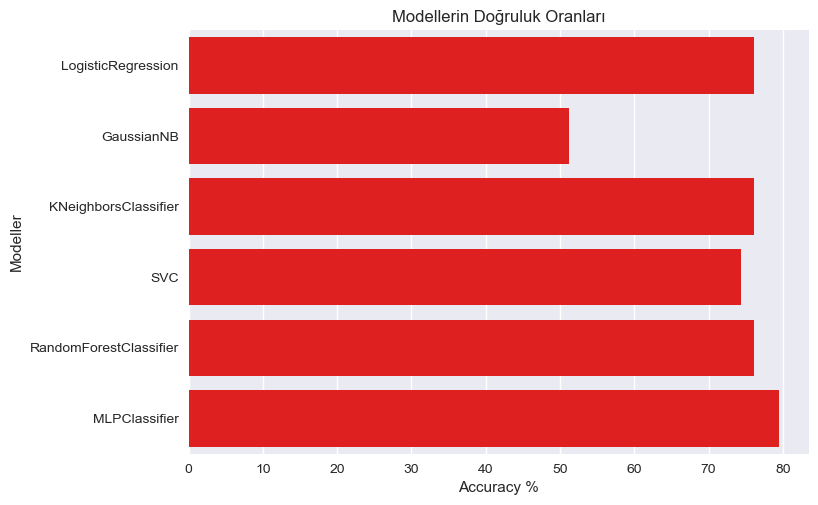

In [162]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');  

## 4.12. Algoritmaların Çalışma Zamanı Karşılaştırılması <a id='4.12'></a>

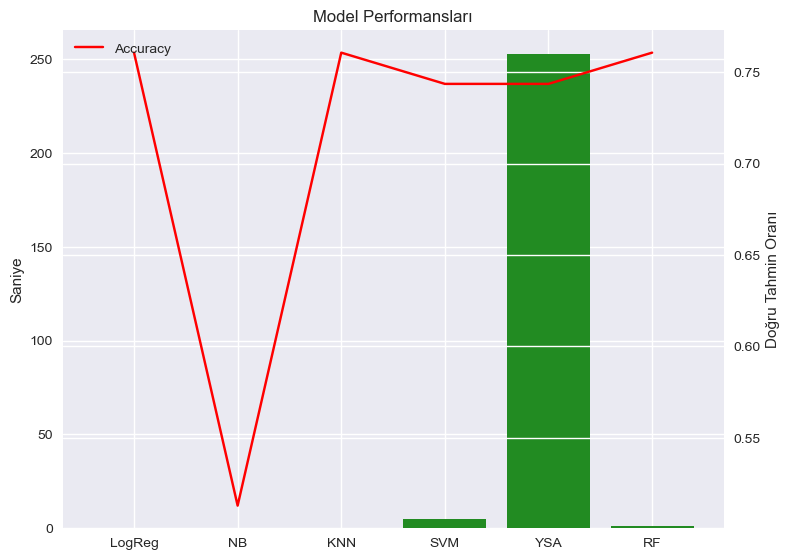

In [163]:
fig, ax1 = plt.subplots()
objects = ['LogReg', 'NB','KNN','SVM','YSA','RF',]
y_pos = np.arange(len(objects))
performance_time = [lr_time, nb_time,  knn_tuned_time, svm_tuned_time,ysa_tuned_time,rf_tuned_time]
performance_acc = [lr_acc, nb_acc, knn_tuned_acc,svm_tuned_acc,ysa_tuned_acc, rf_tuned_acc]
ax1.set_ylabel('Saniye')
ax1.bar(y_pos, performance_time, color='forestgreen')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Doğru Tahmin Oranı') 
ax2.plot(y_pos, performance_acc, color='red')
plt.xticks(y_pos, objects)
fig.tight_layout() 
plt.title('Model Performansları')
plt.legend(['Accuracy'], loc='upper left')
plt.show()

## 4.13. Algoritmaların Cross Validation Karşılaştırılması <a id='4.13'></a>

In [164]:
cv_result = [log_acc_CV,nb_acc_CV, knn_acc_CV,svm_acc_CV,ysa_acc_CV,rf_acc_CV]

                 Modeller  Cross Validation Ortalama
0      LogisticRegression                   0.733333
1    Gaussian Naive Bayes                   0.665909
2    KNeighborsClassifier                   0.741667
3                     SVM                   0.716667
4                     YSA                   0.725000
5  RandomForestClassifier                   0.735606


Text(0.5, 1.0, 'Cross Validation Sonuçlar')

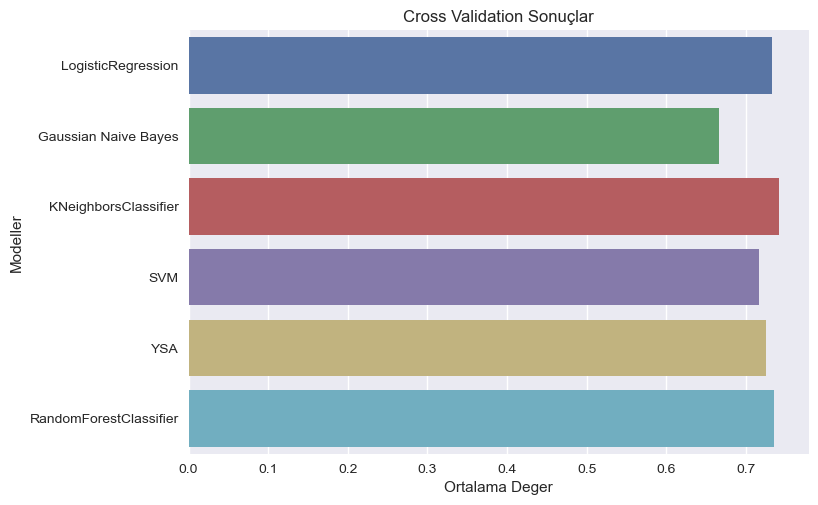

In [165]:
cv_results = pd.DataFrame({"Modeller":["LogisticRegression","Gaussian Naive Bayes","KNeighborsClassifier","SVM","YSA","RandomForestClassifier"], 
                           "Cross Validation Ortalama":cv_result,   })

print(cv_results)

g = sns.barplot("Cross Validation Ortalama", "Modeller", data = cv_results)
g.set_xlabel("Ortalama Deger")
g.set_title("Cross Validation Sonuçlar")

In [166]:
hyper_result = [log_acc_CV, knn_tuned_acc ,svm_tuned_acc,ysa_tuned_acc,rf_tuned_acc]

                 Modeller  Hiper Parametre Sonuçları
0      LogisticRegression                   0.733333
1    KNeighborsClassifier                   0.760684
2                     SVM                   0.743590
3                     YSA                   0.743590
4  RandomForestClassifier                   0.760684


Text(0.5, 1.0, 'Hiper Parametre Sonuçları')

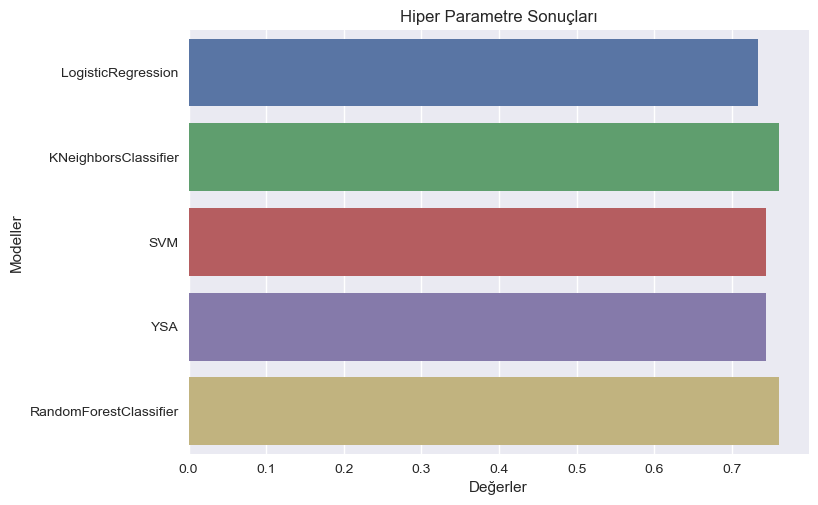

In [167]:
hyper_results = pd.DataFrame({"Modeller":["LogisticRegression","KNeighborsClassifier","SVM","YSA","RandomForestClassifier"], 
                           "Hiper Parametre Sonuçları":hyper_result,   })

print(hyper_results)

g = sns.barplot("Hiper Parametre Sonuçları", "Modeller", data = hyper_results)
g.set_xlabel("Değerler")
g.set_title("Hiper Parametre Sonuçları")